<a href="https://colab.research.google.com/github/hyuntaedo/Data_Analysis/blob/main/KNN_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#KNN Algorithm
머신러닝 알고리즘

- K-Nearest Neighbor

지도학습의 간단한 예시

다양한 레이블의 데이터 중에서 자신과 가장 가까운 데이터를 찾아 레이블을 결정하는 방식



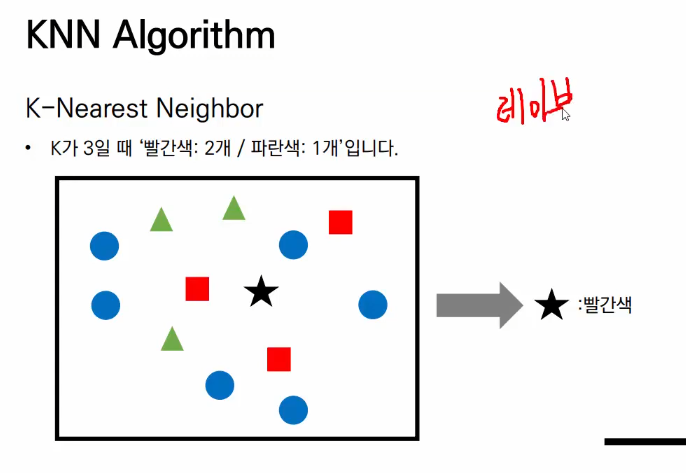

저 별표모양의 데이터는 동그라미 세모 네모에 중 가까운것을 찾아서 가장 가까운데서 뭐가 많은지에 보이는것중에 하나를 선택해서 그 데이터로 들어간다.

result :  [[0.]]
neighbours : [[1. 0. 0.]]
distance:  [[ 26.  52. 857.]]


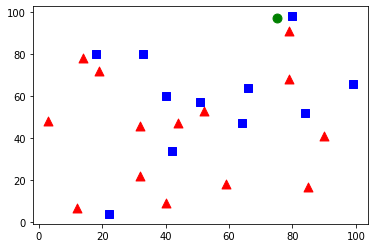

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 각 데이터의 위치: 25 X 2 크기에 각각 0 ~ 100
trainData = np.random.randint(0, 100, (25, 2)).astype(np.float32)
# 각 데이터는 0 or 1
response = np.random.randint(0, 2, (25, 1)).astype(np.float32)

# 값이 0인 데이터를 각각 (x, y) 위치에 빨간색으로 칠합니다.
red = trainData[response.ravel() == 0]
plt.scatter(red[:, 0], red[:, 1], 80, 'r', '^')
# 값이 1인 데이터를 각각 (x, y) 위치에 파란색으로 칠합니다.
blue = trainData[response.ravel() == 1]
plt.scatter(blue[:, 0], blue[:, 1], 80, 'b', 's')

# (0 ~ 100, 0 ~ 100) 위치의 데이터를 하나 생성해 칠합니다.
newcomer = np.random.randint(0, 100, (1, 2)).astype(np.float32)
plt.scatter(newcomer[:, 0], newcomer[:, 1], 80, 'g', 'o')

knn = cv2.ml.KNearest_create()
knn.train(trainData, cv2.ml.ROW_SAMPLE, response)
ret, results, neighbours, dist = knn.findNearest(newcomer, 3)

# 가까운 3개를 찾고, 거리를 고려하여 자신을 정합니다.
print("result : ", results)
print("neighbours :", neighbours)
print("distance: ", dist)

plt.show()

# 숫자인식 예제


In [7]:
from google.colab import files
upload = files.upload()

Saving digits.png to digits.png


In [17]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

image = cv2.imread('digits.png')
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

cells = [np.hsplit(row,100) for row in np.vsplit(gray,50)]
x = np.array(cells)
print(x.shape)

# 20X20이미지를 일자로 처리해야됨(벡터형태로 처리해야함)
train = x[:,:].reshape(-1,400).astype(np.float32)
print(train.shape) #5000개 데이터를 1차원으로 바꾼것

k = np.arange(10)
train_labels = np.repeat(k, 500)[:, np.newaxis]

print(train_labels.shape) # 이미지가 각각 0인지 1인지 2인지 정보를 담음
np.savez("trained.npz",train=train, train_labels=train_labels)

(50, 100, 20, 20)
(5000, 400)
(5000, 1)


True

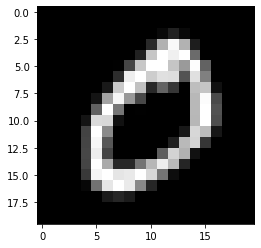

In [19]:
import matplotlib.pyplot as plt

plt.imshow(cv2.cvtColor(x[0,0],cv2.COLOR_GRAY2BGR))

#다음과 같이 하나씩 글자를 저장 가능
cv2.imwrite('test_0.png',x[0,0])
cv2.imwrite('test_1.png',x[5,0])
cv2.imwrite('test_2.png',x[10,0])
cv2.imwrite('test_3.png',x[15,0])
cv2.imwrite('test_4.png',x[20,0])
cv2.imwrite('test_5.png',x[25,0])
cv2.imwrite('test_6.png',x[30,0])
cv2.imwrite('test_7.png',x[35,0])
cv2.imwrite('test_8.png',x[40,0])
cv2.imwrite('test_9.png',x[45,0])


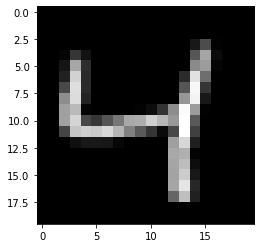

[[4.]]


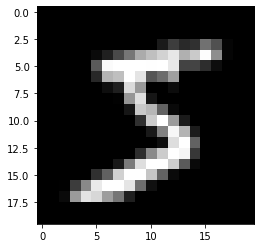

[[5.]]


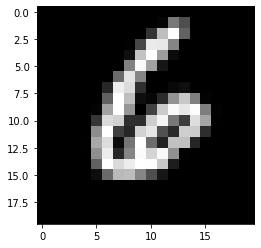

[[6.]]


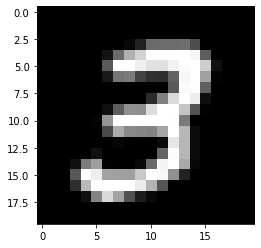

[[3.]]


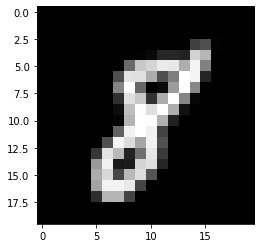

[[8.]]


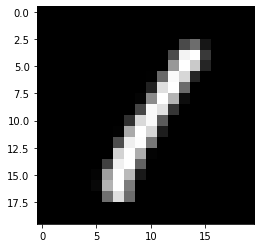

[[1.]]


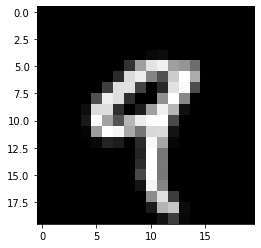

[[9.]]


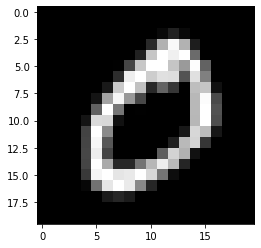

[[0.]]


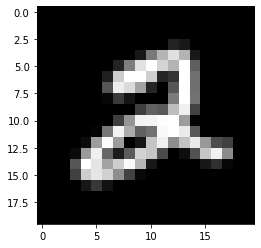

[[2.]]


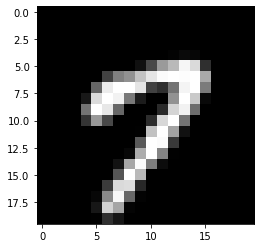

[[7.]]


In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob

FILE_NAME = 'trained.npz'
# 파일로부터 학습 데이터를 불러옴
def load_train_data(file_name):
  with np.load(file_name) as data:
    train = data['train']
    train_labels = data['train_labels']
  return train, train_labels

# 손 글씨 이미지를 (20 x 20) 크기로 Scaling
def resize20(image):
  img = cv2.imread(image)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  gray_resize = cv2.resize(gray, (20, 20))
  plt.imshow(cv2.cvtColor(gray_resize, cv2.COLOR_GRAY2RGB))
  plt.show()
  # 최종적으로는 (1 x 400) 크기로 반환합니다.
  return gray_resize.reshape(-1, 400).astype(np.float32)

def check(test, train, train_labels):
  knn = cv2.ml.KNearest_create()
  knn.train(train, cv2.ml.ROW_SAMPLE, train_labels)
  # 가장 가까운 5개의 글자를 찾아, 어떤 숫자에 해당하는지 찾습니다.
  ret, result, neighbours, dist = knn.findNearest(test, k=5)
  return result

train, train_labels = load_train_data(FILE_NAME)

for file_name in glob.glob('./test_*.png'):
  test = resize20(file_name)
  result = check(test, train, train_labels)
  print(result)